# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise Estatística Para Data Science com Linguagem Python</font>

## <font color='blue'>Lab 3 - Parte 3</font>
## <font color='blue'>Análise Estatística de Séries Temporais</font>

![title](imagens/Lab3.png)

Agora que você está familizarizado com o conceito de estacionariedade, podemos estudar como transformar nossa série em estacionária. Estudaremos esse tópico durante algumas aulas.

Lembre-se que para usar os modelos de previsão de séries temporais é necessário converter primeiro as séries não estacionárias em séries estacionárias.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [2]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise de dados
import scipy
from scipy.stats import boxcox

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

seaborn   : 0.13.2
pandas    : 2.0.3
matplotlib: 3.8.2
scipy     : 1.12.0
numpy     : 1.26.4



## Carregando o Conjunto de Dados

In [4]:
# Carrega os dados
# Observe que estamos carregando os dados e já definindo a data como índice com o parâmetro index_col = 0
dados = pd.read_csv('dados/dataset.csv',
                    header = None,
                    index_col = 0,
                    names = ['veiculos_produzidos'])

In [5]:
# Série
dados.head()

,veiculos_produzidos
2012-01,113
2012-02,119
2012-03,134
2012-04,129
2012-05,121


In [6]:
# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

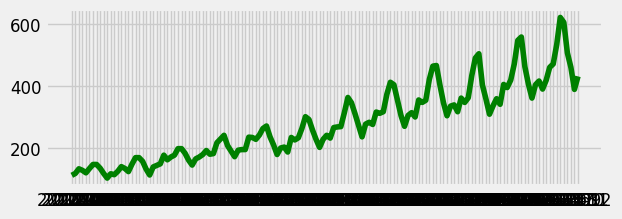

In [7]:
# Área de plotagem
plt.figure(1)

# Gráfico de Linha
plt.subplot(211)
plt.plot(dados['veiculos_produzidos'], color = "green")

(array([24., 27., 19., 18., 22., 13., 10.,  6.,  3.,  2.]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <BarContainer object of 10 artists>)

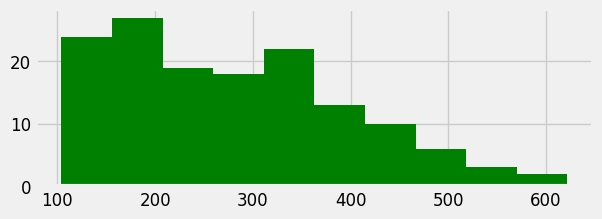

In [8]:
# Histograma
plt.subplot(211)
plt.hist(dados['veiculos_produzidos'], color = 'green')

In [9]:
# Média da série
dados['veiculos_produzidos'].mean()

280.34027777777777

In [10]:
# Desvio Padrão da série
dados['veiculos_produzidos'].std()

119.91728869764205

O conjunto de dados é **não estacionário**, o que significa que a média e a variância das observações mudam ao longo do tempo. Isso dificulta a modelagem por métodos estatísticos clássicos, como ARIMA, e métodos mais sofisticados de aprendizado de máquina, como redes neurais.

A não estacionaridade é causada pelo que parece ser uma tendência crescente e um componente de sazonalidade.

Além disso, a quantidade de alteração ou a variância está aumentando com o tempo. Isso fica claro quando você olha para o tamanho do componente sazonal e percebe que a amplitude (de baixo para cima) está aumentando.

Vamos fazer ciência e experimentar diferentes técnicas de transformação a fim de converter a série em estacionária.

## Transformação de Log

Séries temporais podem ser linearizadas usando o logaritmo dos valores. Isso é chamado de transformação de log. Você com certeza lembra do que é logaritmo pois estudou isso no ensino fundamental. :-)

As transformações de log são populares em dados de séries temporais, pois são eficazes na remoção da variação exponencial.

É importante observar que esta operação assume que os valores são positivos e diferentes de zero. É comum transformar observações adicionando uma constante fixa para garantir que todos os valores de entrada atendam a esse requisito. Por exemplo: serie_transformada_y = log(constante + x)

In [11]:
# Vamos aplicar uma transformação de log usando np.log() e gravamos o resultado em uma nova coluna do nosso dataset
dados['veiculos_produzidos_log'] = np.log(dados['veiculos_produzidos'])
dados.head()

,veiculos_produzidos,veiculos_produzidos_log
2012-01,113,4.727388
2012-02,119,4.779123
2012-03,134,4.897840
2012-04,129,4.859812
2012-05,121,4.795791


,veiculos_produzidos,veiculos_produzidos_log
2012-01,113,4.727388
2012-02,119,4.779123
2012-03,134,4.897840
2012-04,129,4.859812
2012-05,121,4.795791


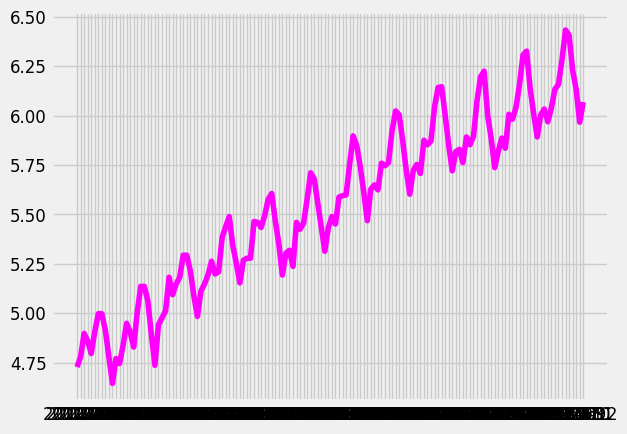

In [12]:
# Plot da série transformada
plt.plot(dados['veiculos_produzidos_log'], color = 'magenta')
dados.head()

(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <BarContainer object of 10 artists>)

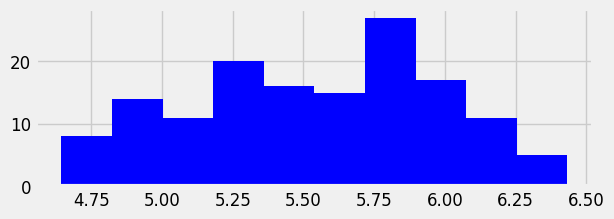

In [13]:
# Histograma da série transformada
plt.subplot(211)
plt.hist(dados['veiculos_produzidos_log'], color = 'blue')

Análise:

-  A execução do exemplo resulta em uma tendência que parece mais linear. O gráfico de linha mostra um crescimento e variação aparentemente lineares.

- O histograma também mostra uma distribuição de observações do tipo gaussiana mais uniforme.

Vamos testar a estacionaridade.

In [23]:
# Função
def testa_estacionaridade(serie):
    
    from statsmodels.tsa.stattools import adfuller
        
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    
    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')
    
    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')
    
    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index=['Estatística do Teste',
                                             'Valor-p',
                                             'Número de Lags Consideradas',
                                             'Númerod de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print(dfsaida)
    
    # Testa o valor-p
    print('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor valor-p é maior que 0.05 e, portanto, não temos evidêncisas para rejeitsr a hipótese nula.')
        print('Essa série provavelmente não é estacionária')
    else:
        print('\nO valor-pr é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula')
        print('Essa série provavelmente é estacionária')

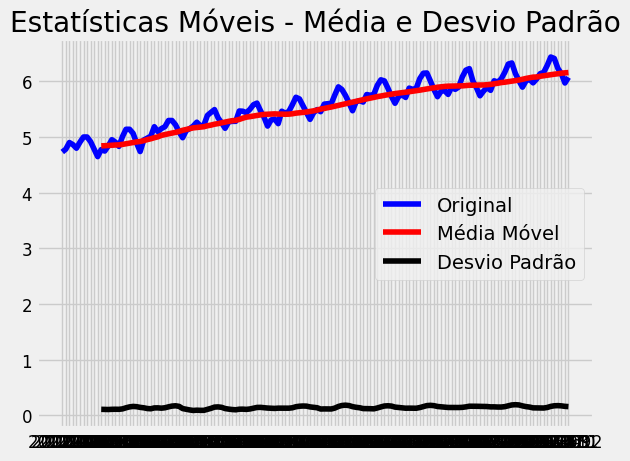


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -1.740668
Valor-p                            0.410290
Número de Lags Consideradas       13.000000
Númerod de Observações Usadas    130.000000
Valor Crítico (1%)                -3.481682
Valor Crítico (5%)                -2.884042
Valor Crítico (10%)               -2.578770
dtype: float64

Conclusão:
nO valor valor-p é maior que 0.05 e, portanto, não temos evidêncisas para rejeitsr a hipótese nula.
Essa série provavelmente não é estacionária


In [19]:
testa_estacionaridade(dados['veiculos_produzidos_log'])

Análise:

- A Transformação de Log não converteu a série em estacionária. Mas ok. Temos ainda outras técnicas a nossa disposição.

## Transformação de Raiz Quadrada

Uma série temporal que tem uma tendência quadrática de crescimento pode ser linearizada calculando sua raiz quadrada.

É possível que nosso conjunto de dados mostre um crescimento quadrático. Se esse for o caso, poderíamos esperar que uma transformação de raiz quadrada, para reduzir a tendência de crescimento, seja linear e alterar a distribuição de observações para talvez ser quase gaussiana.

O exemplo abaixo executa uma raiz quadrada do conjunto de dados e plota os resultados.

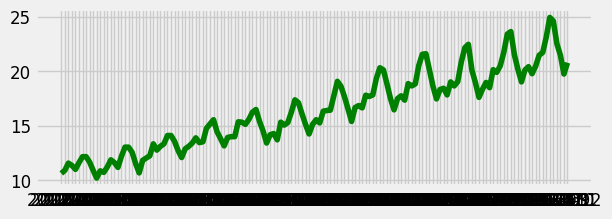

In [20]:
# Transformação de Raiz Quadrada com np.sqrt()
dados_sqrt = np.sqrt(dados['veiculos_produzidos'])

# Gráfico de Linha
plt.subplot(211)
plt.plot(dados_sqrt, color = "green")

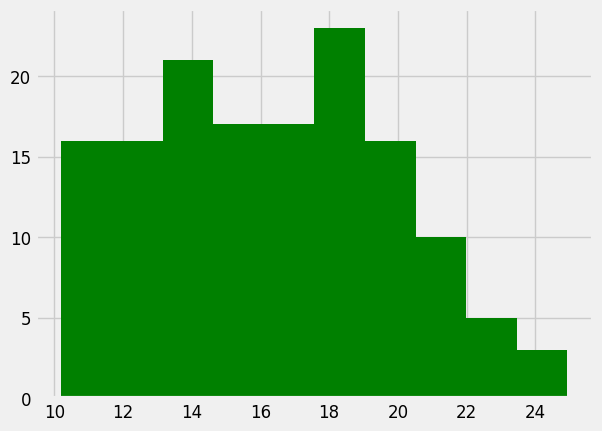

In [21]:
# Histograma
plt.hist(dados_sqrt, color = "green")
plt.show()

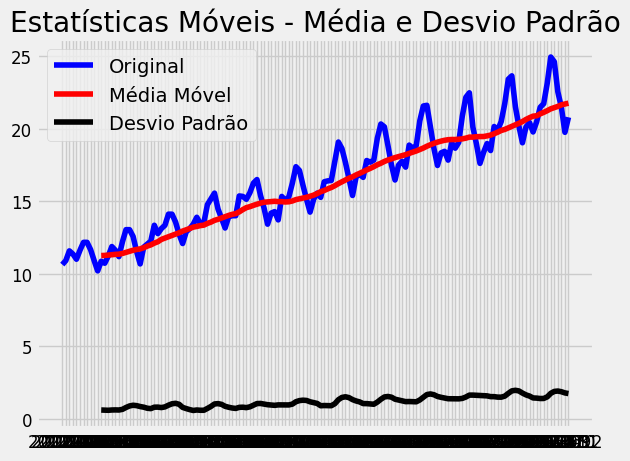


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.363637
Valor-p                            0.915995
Número de Lags Consideradas       13.000000
Númerod de Observações Usadas    130.000000
Valor Crítico (1%)                -3.481682
Valor Crítico (5%)                -2.884042
Valor Crítico (10%)               -2.578770
dtype: float64

Conclusão:
nO valor valor-p é maior que 0.05 e, portanto, não temos evidêncisas para rejeitsr a hipótese nula.
Essa série provavelmente não é estacionária


In [22]:
testa_estacionaridade(dados_sqrt)

Análise:

- Podemos ver que a tendência foi reduzida, mas não foi removida.

- O gráfico de linha ainda mostra uma variação crescente de ciclo para ciclo. E o histograma ainda mostra uma cauda longa à direita da distribuição, sugerindo uma distribuição exponencial ou de cauda longa.

## Transformação Box-Cox

A transformação de raiz quadrada e a transformação de log pertencem a uma classe de transformações denominadas transformações de potência.

A transformação Box-Cox é um método de transformação de dados configurável que suporta a raiz quadrada e a transformação de log, bem como um conjunto de transformações relacionadas.

Mais do que isso, pode ser configurado para avaliar um conjunto de transformações automaticamente e selecionar o melhor ajuste. A série resultante pode ser mais linear e a distribuição resultante mais gaussiana ou uniforme, dependendo do processo que a gerou.

A biblioteca scipy.stats fornece uma implementação da transformação Box-Cox. A função boxcox() usa um argumento, chamado lambda, que controla o tipo de transformação a ser executada.

Abaixo estão alguns valores comuns para lambda

- lambda = -1. é uma transformação recíproca.
- lambda = -0,5 é uma transformação de raiz quadrada recíproca.
- lambda = 0,0 é uma transformação de log.
- lambda = 0,5 é uma transformação de raiz quadrada.
- lambda = 1.0 não é transformação.

Vamos ao exemplo:

In [24]:
# Aplicando Transformação Box-Cox
dados['veiculos_produzidos_box'] = boxcox(dados['veiculos_produzidos'], lmbda = 0.0)
dados.head()

,veiculos_produzidos,veiculos_produzidos_log,veiculos_produzidos_box
2012-01,113,4.727388,4.727388
2012-02,119,4.779123,4.779123
2012-03,134,4.897840,4.897840
2012-04,129,4.859812,4.859812
2012-05,121,4.795791,4.795791


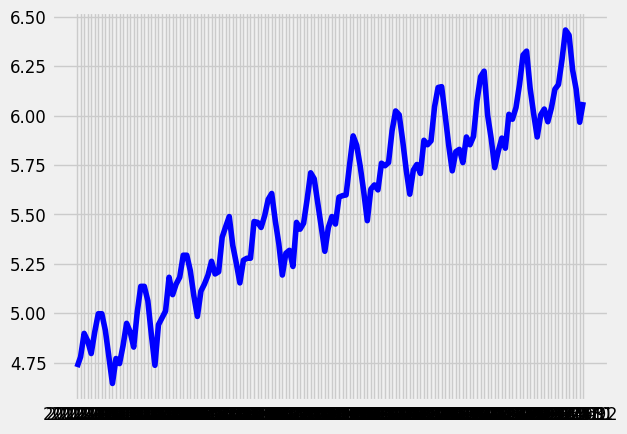

In [25]:
# Plot da série transformada
plt.plot(dados['veiculos_produzidos_box'], color = "blue")
plt.show()

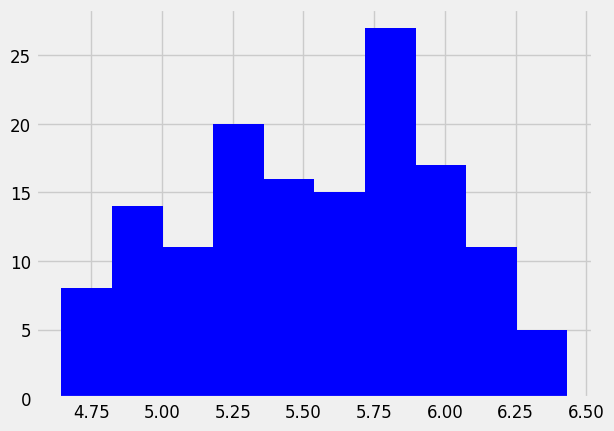

In [26]:
# Histograma
plt.hist(dados['veiculos_produzidos_box'], color = "blue")
plt.show()

Podemos definir o parâmetro lambda como None (o padrão) e deixar a função encontrar um valor ajustado estatisticamente.

O exemplo a seguir demonstra esse uso, retornando o conjunto de dados transformado e o valor lambda escolhido.

In [28]:
# Aplicando Transformação Box-Cox
dados['veiculos_produzidos_box_2'], lam_value = boxcox(dados['veiculos_produzidos'])
print('Valor Ideal de Lambda: %f' % lam_value)
dados.head()

Valor Ideal de Lambda: 0.145515


,veiculos_produzidos,veiculos_produzidos_log,veiculos_produzidos_box,veiculos_produzidos_box_2
2012-01,113,4.727388,4.727388,6.800303
2012-02,119,4.779123,4.779123,6.903622
2012-03,134,4.897840,4.897840,7.143666
2012-04,129,4.859812,4.859812,7.066323
2012-05,121,4.795791,4.795791,6.937073


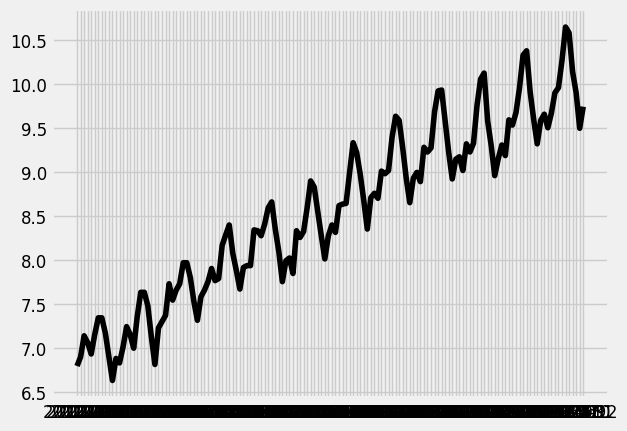

In [29]:
# Plot da série transformada
plt.plot(dados['veiculos_produzidos_box_2'], color = "black")

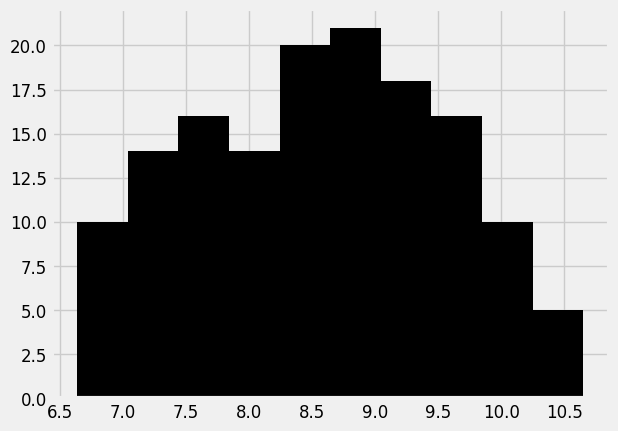

In [30]:
# Histograma
plt.hist(dados['veiculos_produzidos_box_2'], color = "black")
plt.show()

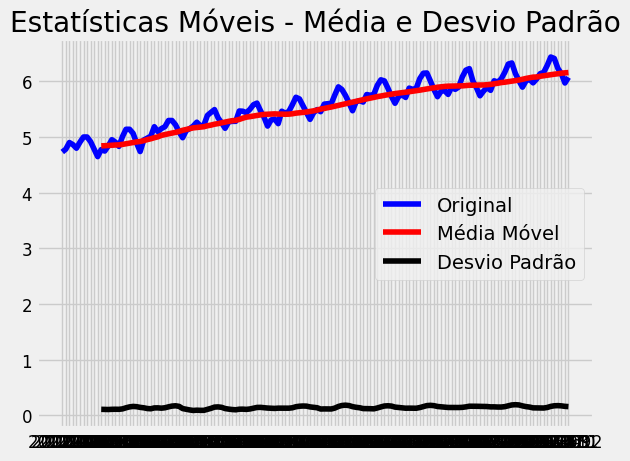


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -1.740668
Valor-p                            0.410290
Número de Lags Consideradas       13.000000
Númerod de Observações Usadas    130.000000
Valor Crítico (1%)                -3.481682
Valor Crítico (5%)                -2.884042
Valor Crítico (10%)               -2.578770
dtype: float64

Conclusão:

O valor valor-p é maior que 0.05 e, portanto, não temos evidêncisas para rejeitsr a hipótese nula.
Essa série provavelmente não é estacionária


In [31]:
testa_estacionaridade(dados['veiculos_produzidos_box'])

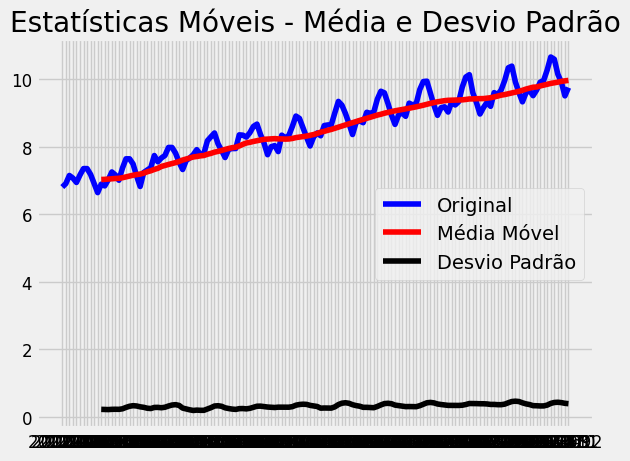


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -1.354872
Valor-p                            0.603710
Número de Lags Consideradas       13.000000
Númerod de Observações Usadas    130.000000
Valor Crítico (1%)                -3.481682
Valor Crítico (5%)                -2.884042
Valor Crítico (10%)               -2.578770
dtype: float64

Conclusão:

O valor valor-p é maior que 0.05 e, portanto, não temos evidêncisas para rejeitsr a hipótese nula.
Essa série provavelmente não é estacionária


In [32]:
testa_estacionaridade(dados['veiculos_produzidos_box_2'])

Análise:

- A execução do exemplo gerou o valor lambda de 0,148.

- Podemos ver que isso está muito próximo de um valor lambda de 0,0, resultando em uma transformação de log mais forte (e menor) que 0.5 para a transformação de raiz quadrada.

Aparentemente nenhuma das técnicas anteriores apresentou resultado para tornar nossa série estacionária. Mas temos ainda algumas cartas na manga, ou melhor, algumas outras técnicas.

# Fim da Parte 3